In [1]:
'''
可视化对比患者健侧患侧差别

读取绝对数值数据
健侧患侧用同一个scaler归一化后进行对比
'''
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from iFEMG_feature import *

In [117]:
# 读取数据，包含双侧三个肌肉信号通道的特征值
affected_df = pd.read_csv(r"E:\Data\积水潭患者数据集\1017s2\affected\1017s2_bicps_br_202312.csv", index_col=0, header=[0,1])
healthy_df = pd.read_csv(r"E:\Data\积水潭患者数据集\1017s2\healthy\1017s2_bicps_br_202312.csv", index_col=0, header=[0,1])
healthy_df.head

<bound method NDFrame.head of        bicps_br                                                       \
   subject_name height(cm) weight(kg) gender age label(kg)       FMG   
0        1017s2        160         70      0  71       0.0  0.090815   
1        1017s2        160         70      0  71       0.0  0.247437   
2        1017s2        160         70      0  71       0.0  0.214394   
3        1017s2        160         70      0  71       0.0  0.304620   
4        1017s2        160         70      0  71       0.0  0.359419   
5        1017s2        160         70      0  71       0.0  0.327209   
6        1017s2        160         70      0  71       0.0  0.344385   
7        1017s2        160         70      0  71       0.0  0.432685   
8        1017s2        160         70      0  71       0.0  0.556626   
9        1017s2        160         70      0  71       0.5  0.355456   
10       1017s2        160         70      0  71       0.5  0.502777   
11       1017s2        160        

In [118]:
# 需要归一化对比的列名
col_name=[("bicps_br", "FMG"),
        ("bicps_br", "mav"),
        ("bicps_br", "rms"),
        ("bicps_br", "wave_length"),
        ("bicps_br", "zero_crossing"),
        ("bicps_br", "slope_sign_change"),
        ("bicps_br", "mean_freq"),
        ("bicps_br", "mean_power_freq"),
        ("tricps_br_medial", "FMG"),
        ("tricps_br_medial", "mav"),
        ("tricps_br_medial", "rms"),
        ("tricps_br_medial", "wave_length"),
        ("tricps_br_medial", "zero_crossing"),
        ("tricps_br_medial", "slope_sign_change"),
        ("tricps_br_medial", "mean_freq"),
        ("tricps_br_medial", "mean_power_freq"),
        ("tricps_br_lateral", "FMG"),
        ("tricps_br_lateral", "mav"),
        ("tricps_br_lateral", "rms"),
        ("tricps_br_lateral", "wave_length"),
        ("tricps_br_lateral", "zero_crossing"),
        ("tricps_br_lateral", "slope_sign_change"),
        ("tricps_br_lateral", "mean_freq"),
        ("tricps_br_lateral", "mean_power_freq")]

# 用健侧初始化scaler
scaler = preprocessing.StandardScaler().fit(healthy_df[col_name])
# 对双侧进行归一化
healthy_df_normed = df_norm_with_selfscaler(healthy_df, col_name, scaler)
affected_df_normed = df_norm_with_selfscaler(affected_df, col_name, scaler)

In [125]:
# 更改肌肉名称 "bicps_br" "tricps_br_medial" "tricps_br_lateral"
show_name = "bicps_br"

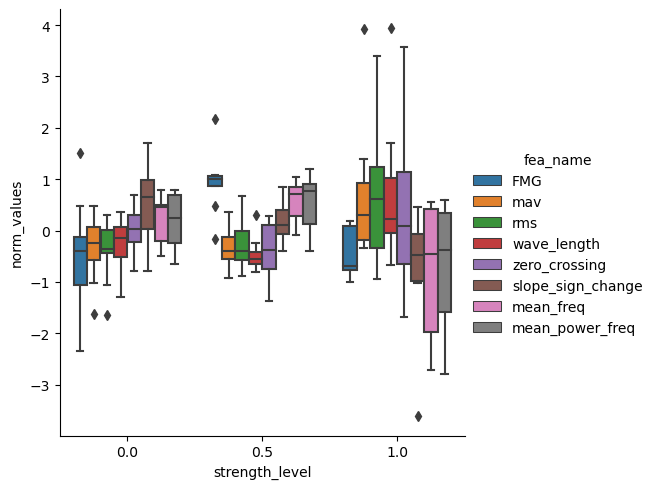

In [126]:
"""
健侧
特征可视化
归一化特征值大小----肌力重量
"""
# 需要显示和归一化的特征名称
col_name = ['FMG', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']

# show figure
show_df = pd.DataFrame(columns = ('strength_level', 'norm_values', 'fea_name'))

for index, row in healthy_df_normed[show_name].iterrows():    # go through each row
    for i in col_name:
        show_df = pd.concat([show_df, pd.DataFrame({'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index = True)
# kind = point(两点连线带errbar)/violin(小提琴图)/box(箱线图)
sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'box')

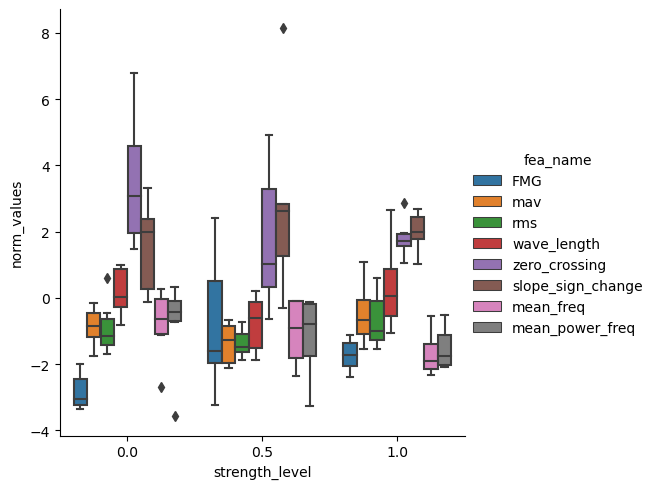

In [127]:
"""
患侧
特征可视化
归一化特征值大小----肌力重量
"""
# 需要显示和归一化的特征名称
col_name = ['FMG', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']

# show figure
show_df = pd.DataFrame(columns = ('strength_level', 'norm_values', 'fea_name'))

for index, row in affected_df_normed[show_name].iterrows():    # go through each row
    for i in col_name:
        show_df = pd.concat([show_df, pd.DataFrame({'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index = True)
# kind = point(两点连线带errbar)/violin(小提琴图)/box(箱线图)
sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'box')